In [40]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm

In [41]:
# 1.Download the data file above and read it into a pandas DataFrame.

In [42]:
homes = pd.read_csv('data/homes.csv')
homes.head()

,Sell,"""List""","""Living""","""Rooms""","""Beds""","""Baths""","""Age""","""Acres""","""Taxes"""
0,142,160,28,10,5,3,60,0.28,3167
1,175,180,18,8,4,1,12,0.43,4033
2,129,132,13,6,3,1,41,0.33,1471
3,138,140,17,7,3,1,22,0.46,3204
4,232,240,25,8,4,3,5,2.05,3613


In [43]:
# 2.Add the code necessary to describe the dataset

In [44]:
homes.describe().round(2)

,Sell,"""List""","""Living""","""Rooms""","""Beds""","""Baths""","""Age""","""Acres""","""Taxes"""
count,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00
mean,170.36,178.34,21.12,8.06,3.82,1.86,30.22,1.02,3706.10
std,72.76,79.38,8.35,1.28,0.69,0.76,30.96,1.19,1579.92
min,87.00,90.00,10.00,5.00,3.00,1.00,2.00,0.22,1445.00
25%,135.00,140.00,17.00,7.00,3.00,1.00,12.25,0.38,3107.00
50%,152.00,160.00,20.00,8.00,4.00,2.00,24.50,0.55,3490.00
75%,182.25,190.00,22.75,9.00,4.00,2.00,37.00,1.18,3919.25
max,567.00,625.00,64.00,12.00,6.00,4.00,202.00,6.49,12192.00


In [45]:
# 3.Using markdown commentary describe the dataset 

In [46]:
homes.shape

(50, 9)

The Dataset contains a list 50 records and 9 columns of home values. It contains what appears to be Sell and Listed prices. It also contains the specifics of the home layout including number of rooms, beds and baths. Also the age of the home, the size of the plot and what appears to be taxes. This last column for taxes shows some odd values as they aree bigger than List or Sell (potentially these values have been reduced and divided by 1000). 

In [47]:
# 4.Conduct at least three EDA techniques on the dataset, 
# include markdown commentary to describe what you are doing, 
# why you are doing it and the results of each analysis

With the "info" code we are trying to understand whether there are null values in the dataset. If so we would need to decide based on the findings whether to delete the rows, include the mean or median to the missing values or other data management startegies. 

In [48]:
homes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Sell       50 non-null     int64  
 1    "List"    50 non-null     int64  
 2    "Living"  50 non-null     int64  
 3    "Rooms"   50 non-null     int64  
 4    "Beds"    50 non-null     int64  
 5    "Baths"   50 non-null     int64  
 6    "Age"     50 non-null     int64  
 7    "Acres"   50 non-null     float64
 8    "Taxes"   50 non-null     int64  
dtypes: float64(1), int64(8)
memory usage: 3.6 KB


With the "corr" code we are trying to understand the correlation between values in the dataset. If there is a strong correlation between values, we will need to pick one of the columns and potentially remove the other.

In [49]:
homes.corr()

,Sell,"""List""","""Living""","""Rooms""","""Beds""","""Baths""","""Age""","""Acres""","""Taxes"""
Sell,1.000000,0.997433,0.879381,0.560425,0.335113,0.640059,-0.147343,0.168713,0.899339
"""List""",0.997433,1.000000,0.891618,0.570704,0.320470,0.640295,-0.130325,0.166838,0.906636
"""Living""",0.879381,0.891618,1.000000,0.750933,0.467277,0.668437,0.125075,0.177488,0.810243
"""Rooms""",0.560425,0.570704,0.750933,1.000000,0.656557,0.555187,0.371237,0.282448,0.516593
"""Beds""",0.335113,0.320470,0.467277,0.656557,1.000000,0.458682,0.141205,0.036832,0.313638
"""Baths""",0.640059,0.640295,0.668437,0.555187,0.458682,1.000000,-0.023063,0.301119,0.582622
"""Age""",-0.147343,-0.130325,0.125075,0.371237,0.141205,-0.023063,1.000000,0.303733,-0.189221
"""Acres""",0.168713,0.166838,0.177488,0.282448,0.036832,0.301119,0.303733,1.000000,0.059647
"""Taxes""",0.899339,0.906636,0.810243,0.516593,0.313638,0.582622,-0.189221,0.059647,1.000000


With the "boxplot" code we are trying to understand the outliers in the dataset. Once we find them we will need to decide whether we remove them or not, depending on what is the desired outcome. 

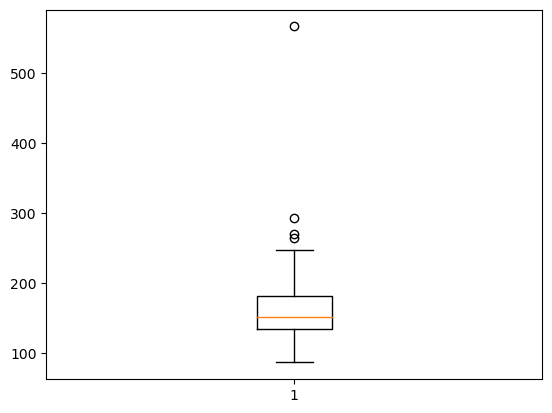

In [50]:
plt.boxplot(homes['Sell']);

In [51]:
# 5.Using Taxes as the independent variable and Sell as the dependent variable, fit a linear regression 
# model and display the output from the model

In [56]:
# Re-defining column names so that they can be read by the linear regression model. 
homes.columns =['Sell', 'List', 'Living', 'Rooms','Beds','Baths','Age','Acres','Taxes']
homes.head()

,Sell,List,Living,Rooms,Beds,Baths,Age,Acres,Taxes
0,142,160,28,10,5,3,60,0.28,3167
1,175,180,18,8,4,1,12,0.43,4033
2,129,132,13,6,3,1,41,0.33,1471
3,138,140,17,7,3,1,22,0.46,3204
4,232,240,25,8,4,3,5,2.05,3613


In [58]:
y = homes['Sell']
x = homes['Taxes']
x = sm.add_constant(x)
x.head()

,const,Taxes
0,1.0,3167
1,1.0,4033
2,1.0,1471
3,1.0,3204
4,1.0,3613


In [59]:
model = sm.OLS(y, x).fit()

In [60]:
# 6.In addition to the model output include markdown commentary about the important 
# statistics from the output; is taxes a good predictor for selling price? Why or why not?

In [61]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Sell   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     203.1
Date:                Sat, 17 Feb 2024   Prob (F-statistic):           7.22e-19
Time:                        14:26:52   Log-Likelihood:                -243.44
No. Observations:                  50   AIC:                             490.9
Df Residuals:                      48   BIC:                             494.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.8719     11.691      1.443      0.155      -6.635      40.378
Taxes          0.0414      0.003     14.250      0.000       0.036       0.047
==============================================================================
Omnibus:                       28.767   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.574
Skew:                           1.690   Prob(JB):                     1.16e-13
Kurtosis:                       7.144   Cond. No.                     1.03e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We can confidently say that Taxes is a good predictor for the selling price. The R-squared value shows that about 80.5% of the changes in the selling price can be explained by Taxes. Also, the low p-value indicates a strong positive connection between Taxes and the selling price.

On the other hand, we should check if the Taxes column reflects a tax value based on the selling price, explaining the 0.9 correlation found in homes.corr(), or if the Taxes column shows the annual taxed payed by each home. In absence of a dictionary describing the values of the Dataframe we cannot assess at this point.

In [64]:
# 7.Repeat this procedure using one of the other variables as the independent variable. 
# Which model is "better"? What are some limitations of the model? 

In [95]:
y = homes['Sell']
x = homes['Acres']
x = sm.add_constant(x)
x.head()

,const,Acres
0,1.0,0.28
1,1.0,0.43
2,1.0,0.33
3,1.0,0.46
4,1.0,2.05


In [96]:
model = sm.OLS(y, x).fit()

In [97]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Sell   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     1.406
Date:                Sat, 17 Feb 2024   Prob (F-statistic):              0.242
Time:                        15:36:27   Log-Likelihood:                -284.08
No. Observations:                  50   AIC:                             572.2
Df Residuals:                      48   BIC:                             576.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        159.8457     13.550     11.797      0.000     132.601     187.090
Acres         10.3021      8.687      1.186      0.242      -7.165      27.769
==============================================================================
Omnibus:                       70.495   Durbin-Watson:                   2.149
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              740.048
Skew:                           3.678   Prob(JB):                    2.00e-161
Kurtosis:                      20.353   Cond. No.                         2.51
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

After testing the Model with other independent variables we see that the best performing model would be the one created with Taxes as an independent variable.
The limitations of the model lay on depending only on one variable instead of multiple ones. A better model can be created using all the other variables in the Dataframe. 